In [45]:
# IMPORT LIBRARIES


# Exploratory data analysis (EDA) and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots appear in the notebook
%matplotlib inline

## Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import Model, Input 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Sequential
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib

# Column transformations
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

## Model evaluation tools
import optuna
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score



# Print last updated timestamp
import time
print(f"Last updated: {time.asctime()}")

Last updated: Mon Nov  3 18:48:26 2025


In [46]:
# UCI heart disease dataset from Kaggle https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

# load file
df = pd.read_csv("../data/heart_disease_classification_dataset.csv")
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# df.shape
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [47]:
# Number of positive (1) and negative (0) samples in our dataset
df.target.value_counts()

target
yes    165
no     138
Name: count, dtype: int64

In [48]:
# Normalized value counts
df.target.value_counts(normalize=True)

target
yes    0.544554
no     0.455446
Name: proportion, dtype: float64

In [49]:
# Number of missing values per column
missing_per_column = df.isna().sum()
print(missing_per_column)

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [51]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165
mean,54.366337,NaN,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531,NaN
std,9.082101,NaN,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277,NaN
min,29.000000,NaN,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,47.500000,NaN,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,NaN
50%,55.000000,NaN,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,NaN
75%,61.000000,NaN,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,NaN


In [52]:

# CLEAN AND CONVERT DATA AND COLUMN TYPES

# Simple encoding of the categorical variables (applicable to variables with two values, like those below)
df['sex'] = df['sex'].map({'female':0, 'male':1})
df['target'] = df['target'].map({'no':0, 'yes':1})

# Initial handling of the missing values
df = df.replace({None: np.nan, '': np.nan, '?': np.nan})  # optional: convert None, blank or ? strings to NaN
df = df.fillna(np.nan)  # ensures any remaining missing values are np.nan

num_cols = df.select_dtypes(include=[np.number, 'int64', 'float64']).columns
print("Numeric columns before cleaning:", num_cols)
cat_cols = df.select_dtypes(include=['category', 'object']).columns
print("Categorical columns before cleaning:", cat_cols)
date_cols = list(df.select_dtypes(include=['datetime64']).columns)
print("Date columns before cleaning:", date_cols)


# CONVERT SOME NUMERICAL COLUMNS TO CATEGORICAL (BASED ON THEIR VALUES)
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')


#PRINT COLUMNS BY DATA TYPE
num_cols = df.select_dtypes(include=[np.number, 'int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['category', 'object']).columns
date_cols = df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns
print("Numeric columns after cleaning and conversion:", num_cols)
print("Categorical columns after cleaning and conversion:", cat_cols) 
print("Date columns:", date_cols)



Numeric columns before cleaning: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Categorical columns before cleaning: Index([], dtype='object')
Date columns before cleaning: []
Numeric columns after cleaning and conversion: Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target'], dtype='object')
Categorical columns after cleaning and conversion: Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')
Date columns: Index([], dtype='object')


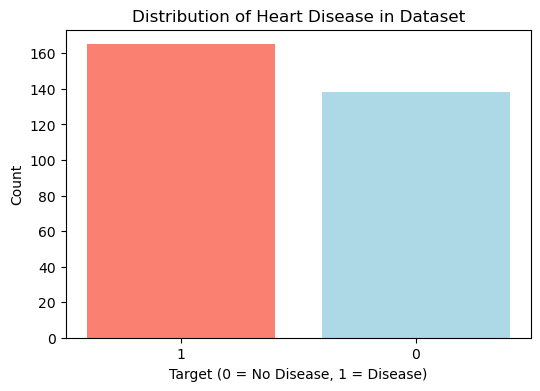

In [53]:
# PLOTTING DISTRIBUTION OF TARGET VALUES

counts = df['target'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values, color=["salmon", "lightblue"])
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease in Dataset")
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  299 non-null    float64 
 4   chol      302 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   298 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    int64   
dtypes: category(8), float64(4), int64(2)
memory usage: 17.9 KB


In [55]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.0,303.0,299.000000,302.000000,303.0,303.0,298.000000,303.0,303.000000,303.0,303.0,303.0,303.000000
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,5.0,4.0,NaN
top,NaN,1.0,0.0,NaN,NaN,0.0,1.0,NaN,0.0,NaN,2.0,0.0,2.0,NaN
freq,NaN,207.0,143.0,NaN,NaN,258.0,152.0,NaN,204.0,NaN,142.0,175.0,166.0,NaN
mean,54.366337,NaN,NaN,131.712375,246.317881,NaN,NaN,149.865772,NaN,1.039604,NaN,NaN,NaN,0.544554
std,9.082101,NaN,NaN,17.629032,51.908285,NaN,NaN,22.563687,NaN,1.161075,NaN,NaN,NaN,0.498835
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,47.500000,NaN,NaN,120.000000,211.000000,NaN,NaN,134.500000,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,55.000000,NaN,NaN,130.000000,240.500000,NaN,NaN,152.500000,NaN,0.800000,NaN,NaN,NaN,1.000000
75%,61.000000,NaN,NaN,140.000000,274.750000,NaN,NaN,166.000000,NaN,1.600000,NaN,NaN,NaN,1.000000


In [56]:
# CROSSTAB TABLE - HEART DISEASE BY SEX

ct = pd.crosstab(df.target, df.sex)
ct

sex,0,1
target,,
0,24,114
1,72,93


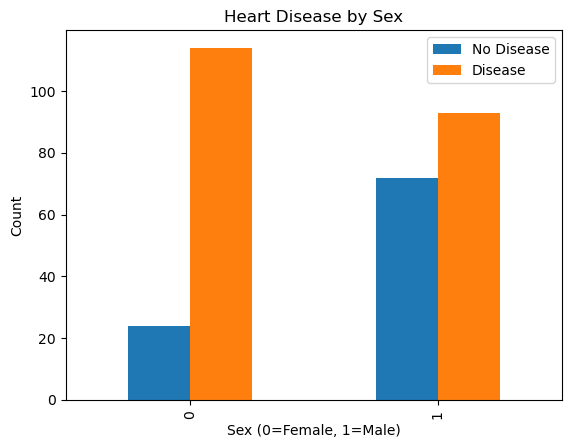

In [57]:
# PLOTTING HEART DISEASE BY SEX

ct.plot(kind='bar')
plt.title('Heart Disease by Sex')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

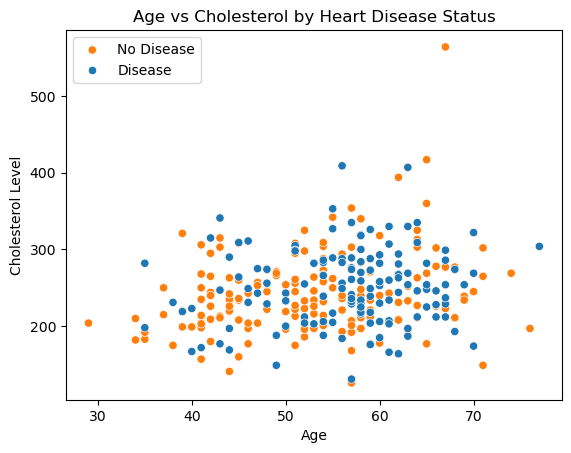

In [58]:
# PLOTTING AGE VS CHOLESTEROL BY HEART DISEASE STATUS

sns.scatterplot(x=df.age, y=df.chol, hue=df.target)
plt.title('Age vs Cholesterol by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.legend(['No Disease', 'Disease'])
plt.show()

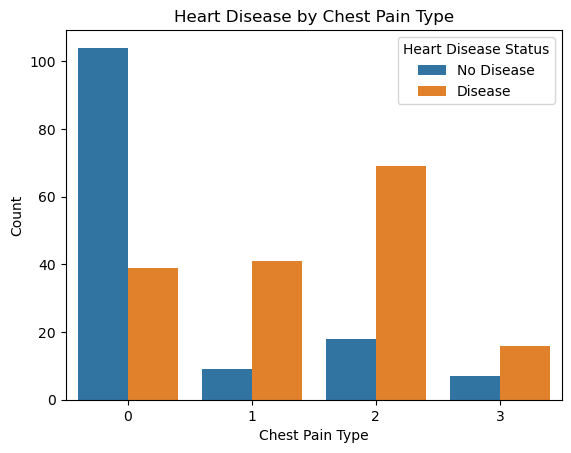

In [59]:
# PLOTTING HEART DISEASE BY CHEST PAIN TYPE

sns.countplot(data=df, x='cp', hue='target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Heart Disease by Chest Pain Type')
plt.legend(title='Heart Disease Status', labels=['No Disease', 'Disease'])
plt.show()

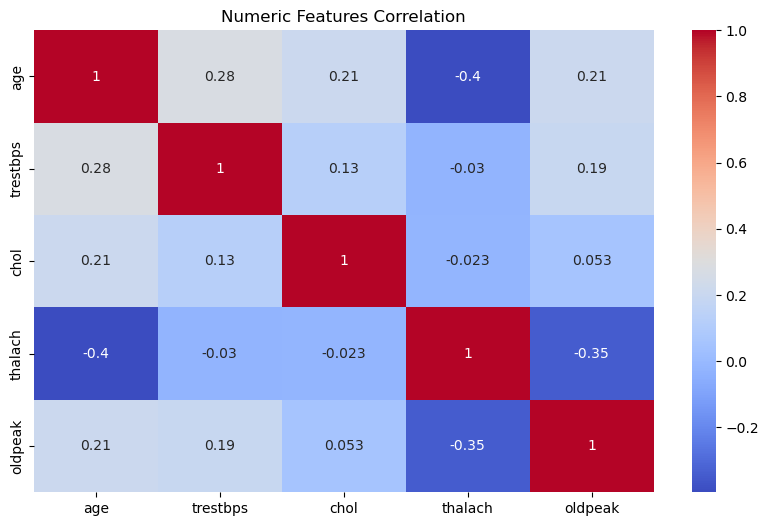

In [60]:
# CORRELATION HEATMAP FOR NUMERIC FEATURES
num_cols = num_cols.tolist()
num_cols.remove('target')
if len(num_cols) > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Numeric Features Correlation')
    plt.show()

In [61]:
# REMOVE DUPLICATES

initial_count = df.shape[0]
df = df.drop_duplicates()
print(f"\nRemoved {initial_count - df.shape[0]} duplicate rows.")


Removed 1 duplicate rows.


In [62]:
# # DETECT & REMOVE OUTLIERS

# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import zscore

# def remove_outliers(df, method='zscore', threshold=3, show_plots=False):
#     numeric_cols = df.select_dtypes(include=['number']).columns
#     if len(numeric_cols) == 0:
#         print("No numeric columns found.")
#         return df

#     print("Numeric columns for outlier detection:", list(numeric_cols))

#     # Optional boxplots
#     if show_plots:
#         for col in numeric_cols:
#             plt.figure()
#             sns.boxplot(x=df[col])
#             plt.title(f'Boxplot: {col}')
#             plt.show()

#     n_rows_before = len(df)  # store original number of rows

#     if method == 'zscore':
#         # Ensure output is always 2D NumPy array
#         z = np.abs(zscore(df[numeric_cols].to_numpy(), nan_policy='omit'))
#         outlier_mask = (z > threshold)
#         for i, col in enumerate(numeric_cols):
#             num_outliers = outlier_mask[:, i].sum()
#             print(f"{col}: {num_outliers} outliers ({num_outliers / n_rows_before * 100:.2f}%)")

#         # Keep only rows without any outlier
#         df = df[(z < threshold).all(axis=1)]

#     elif method == 'iqr':
#         for col in numeric_cols:
#             Q1 = df[col].quantile(0.25)
#             Q3 = df[col].quantile(0.75)
#             IQR = Q3 - Q1
#             mask = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)
#             num_outliers = (~mask).sum()
#             print(f"{col}: {num_outliers} outliers ({num_outliers / n_rows_before * 100:.2f}%)")
#             df = df[mask]

#     n_rows_after = len(df)
#     print(f"\nTotal rows removed: {n_rows_before - n_rows_after} ({(n_rows_before - n_rows_after) / n_rows_before * 100:.2f}%)")
#     print("Outliers handled.\n")
#     return df
# #df = remove_outliers(df, method='zscore', threshold=3, show_plots=False)

In [63]:
np.random.seed(42)

In [64]:
# DATA PREPARATION - CREATING FEATURES AND TARGET VARIABLE, CONVERTING TO NUMPY, GETTING NUMERICAL AND CATEGORICAL COLUMNS, AND THEIR INDICES

# Separate features and target variable
X = df.drop("target", axis=1).to_numpy()  # Feature matrix
y = df["target"].to_numpy()  # Select target variable and convert to np.array

# Identify numeric and categorical columns and their indices
df = df.drop(columns=['target'], errors='ignore')
num_cols = df.select_dtypes(include=[np.number, 'int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['category', 'object']).columns
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols) 
# Define column indices
num_cols_idx = df.columns.get_indexer(num_cols)
cat_cols_idx = df.columns.get_indexer(cat_cols)
print("Numeric column indices:", num_cols_idx)
print("Categorical column indices:", cat_cols_idx) 

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Numeric columns: Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')
Categorical columns: Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')
Numeric column indices: [0 3 4 7 9]
Categorical column indices: [ 1  2  5  6  8 10 11 12]
Feature matrix shape: (302, 13)
Target vector shape: (302,)


In [65]:
# SPLITTING INTO TRAINING AND TEST DATA, AND TRANSFORMING DATA

def split_transform_data(X, y, test_size=0.2, num_cols_idx=num_cols_idx, cat_cols_idx=cat_cols_idx):
    """
    Splits the data into training and testing sets, applies imputation and encoding.
    
    Parameters:
    X : np.array
        Feature matrix.
    y : np.array
        Target vector.
    test_size : float
        Proportion of the dataset to include in the test split.
    num_cols_idx : list
        Indices of numeric columns
    cat_cols_idx : list
        Indices of categorical columns
    """

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SimpleImputer to numeric columns
    imputer = SimpleImputer(strategy='mean')
    X_train[:,num_cols_idx] = imputer.fit_transform(X_train[:,num_cols_idx])
    X_test[:,num_cols_idx]  = imputer.transform(X_test[:,num_cols_idx])

    # Apply SimpleImputer to categorical columns
    imputer_cat = SimpleImputer(strategy='most_frequent')
    if len(cat_cols_idx) > 0:
        X_train[:,cat_cols_idx] = imputer_cat.fit_transform(X_train[:,cat_cols_idx])
        X_test[:,cat_cols_idx]  = imputer_cat.transform(X_test[:,cat_cols_idx])

    # Apply feature scaling to selected (true) numerical columns
    sc = StandardScaler()
    X_train[:,num_cols_idx] = sc.fit_transform(X_train[:,num_cols_idx])
    X_test[:,num_cols_idx] = sc.transform(X_test[:,num_cols_idx])

    # Apply OneHotEncoder to categorical columns
    ct = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols_idx)
            ],
            remainder='passthrough'  # Keep non-specified columns as they are
        )
    

    X_train = ct.fit_transform(X_train)
    X_test = ct.transform(X_test)

    # Creating LabelEncoder - optional
    le = LabelEncoder()
    # y_train = le.fit_transform(y_train)
    # y_test  = le.transform(y_test)
    return X_train, X_test, y_train, y_test, imputer, imputer_cat, sc, ct, le


In [66]:
# COMPARING DIFFERENT CLASSIFIER MODELS


X_trainval, X_test, y_trainval, y_test, imputer, imputer_cat, sc, ct, le = split_transform_data(X, y, test_size=0.2, num_cols_idx=num_cols_idx, cat_cols_idx=cat_cols_idx)


models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

models_accuracy = {}

for name, model in models.items():
    # Perform 5-fold cross-validation on the training data
    cv_scores = cross_val_score(model, X_trainval, y_trainval, cv=5, scoring='accuracy')
    # Store the mean accuracy
    models_accuracy[name] = np.mean(cv_scores)

models_accuracy




{'KNN': 0.8090986394557824,
 'Logistic Regression': 0.8422619047619048,
 'Random Forest': 0.8255952380952382,
 'XGBoost': 0.8133503401360545}

In [67]:
# CREATING DATAFRAME TO DISPLAY DATA ABOUT DIFFERENT MODELS AND THEIR ACCURACY

models_df = pd.DataFrame(models_accuracy, index=['accuracy'])
models_df = models_df.T.reset_index().rename(columns={'index': 'model'})
models_df

,model,accuracy
0,KNN,0.809099
1,Logistic Regression,0.842262
2,Random Forest,0.825595
3,XGBoost,0.813350


<Axes: xlabel='model', ylabel='accuracy'>

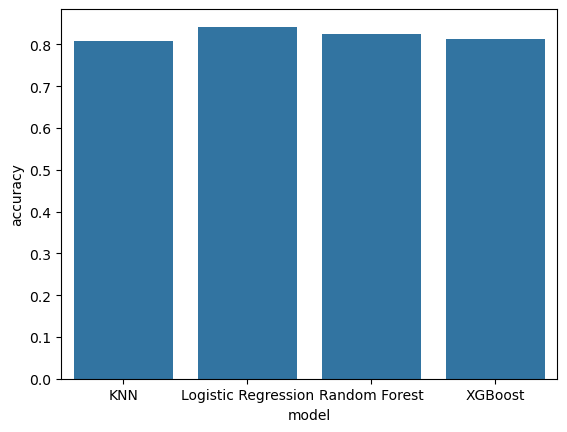

In [68]:
# VISUALIZING DIFFERENT MODELS

sns.barplot(data=models_df, x='model', y='accuracy')

In [69]:
# CREATING AND EVALUATING NEURAL NETWORK CLASSIFIER FOR HEART DISEASE PREDICTION


# model = Sequential([
#     Dense(10, activation='relu', input_shape=(13,)),
#     Dense(6, activation='relu'),
#     Dense(3, activation='relu'),
#     Dense(1, activation='sigmoid')  # binary output
# ])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()

# model.fit(X_trainval, y_trainval, epochs=50, batch_size=16, validation_split=0.2)

# # Evaluate the model
# train_loss, train_accuracy = model.evaluate(X_trainval, y_trainval, verbose=0)
# print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")


# Alternative approach using Functional API
inputs = Input(shape=(30,)) 
x = Dense(10, activation='relu')(inputs) 
x = Dense(6, activation='relu')(x) 
x = Dense(3, activation='relu')(x) 
outputs = Dense(1, activation='sigmoid')(x) 
model = Model(inputs=inputs, outputs=outputs) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
model.summary() 
 
model.fit(X_trainval, y_trainval, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_trainval, y_trainval, verbose=0)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3906 - loss: 0.7116 - val_accuracy: 0.4898 - val_loss: 0.7057
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4844 - loss: 0.6985 - val_accuracy: 0.4898 - val_loss: 0.6961
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5417 - loss: 0.6913 - val_accuracy: 0.5510 - val_loss: 0.6903
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5938 - loss: 0.6856 - val_accuracy: 0.6122 - val_loss: 0.6870
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6406 - loss: 0.6792 - val_accuracy: 0.5918 - val_loss: 0.6839
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6771 - loss: 0.6718 - val_accuracy: 0.6939 - val_loss: 0.6782
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7344 - loss: 0.6593 - val_accuracy: 0.7143 - val_loss: 0.6697
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7604 - loss: 0.6430 - val_accuracy: 0.7551 - val_loss

In [70]:
# HYPERPARAMETER TUNING FOR XGB ALGORITHM

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters to tune
    param = {
    'max_depth': trial.suggest_int('max_depth', 3, 10),
    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
    'n_estimators': trial.suggest_int('n_estimators', 50, 500),
    'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    'gamma': trial.suggest_float('gamma', 0.0, 5.0),
    'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
    'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
    'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 10.0),
    'eval_metric': 'logloss'
}

   
    # Create and train model
    model = XGBClassifier(**param)
    score = cross_val_score(model, X_trainval, y_trainval, cv=3, scoring='accuracy').mean()
    return score  # Optuna will try to maximize this

# Create a study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print best hyperparameters
print("Best trial:")
trial = study.best_trial
print(f"  Accuracy: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Creating final model with the best hyperparameters
best_model_xgb = XGBClassifier(**trial.params, eval_metric='logloss')


[I 2025-11-03 18:48:32,250] A new study created in memory with name: no-name-f7f2fda1-5c81-4fe9-b7e8-cfadd29fdfaa
[I 2025-11-03 18:48:32,469] Trial 0 finished with value: 0.8006687242798355 and parameters: {'max_depth': 10, 'learning_rate': 0.10140876512488783, 'n_estimators': 494, 'subsample': 0.5030136168000618, 'colsample_bytree': 0.7040093585594953, 'min_child_weight': 3, 'gamma': 0.2046376069529171, 'reg_alpha': 0.779192497017292, 'reg_lambda': 2.6183319143075567, 'scale_pos_weight': 7.7350532016032085}. Best is trial 0 with value: 0.8006687242798355.
[I 2025-11-03 18:48:32,514] Trial 1 finished with value: 0.8090534979423868 and parameters: {'max_depth': 6, 'learning_rate': 0.2767065188815594, 'n_estimators': 72, 'subsample': 0.6340171186828516, 'colsample_bytree': 0.794198660314547, 'min_child_weight': 7, 'gamma': 3.904254656149759, 'reg_alpha': 1.6804904410104504, 'reg_lambda': 3.877819420347453, 'scale_pos_weight': 1.882652513146406}. Best is trial 1 with value: 0.809053497942

Best trial:
  Accuracy: 0.8297325102880658
  Params: 
    max_depth: 3
    learning_rate: 0.29476239361749224
    n_estimators: 251
    subsample: 0.5479519939139852
    colsample_bytree: 0.5556799773269072
    min_child_weight: 6
    gamma: 1.8114021117424997
    reg_alpha: 3.953761674647519
    reg_lambda: 0.7342605745099777
    scale_pos_weight: 2.0262754769173137


In [ ]:
# HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION ALGORITHM

X_trainval, X_test, y_trainval, y_test, imputer, imputer_cat, sc, ct, le = split_transform_data(X, y, test_size=0.2, num_cols_idx=num_cols_idx, cat_cols_idx=cat_cols_idx)

from optuna.exceptions import TrialPruned

# Define the objective function for Optuna

def objective(trial):
    # Suggest penalty (exclude None to avoid ignoring C/l1_ratio)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])

    # Fixed solver search space (exclude 'sag' to avoid SAG convergence issues)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'newton-cg', 'saga'])

    # Validate (penalty, solver) compatibility; prune invalid combos
    valid = (
        (penalty == 'l1' and solver in ['liblinear', 'saga']) or
        (penalty == 'l2' and solver in ['lbfgs', 'liblinear', 'newton-cg', 'saga']) or
        (penalty == 'elasticnet' and solver in ['saga'])
    )
    if not valid:
        raise TrialPruned('Invalid (penalty, solver) combination.')

    # Only set l1_ratio if penalty is elasticnet
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0) if penalty == 'elasticnet' else None

    # Regularization strength
    C = trial.suggest_float('C', 0.001, 100.0, log=True)

    # Create Logistic Regression model (higher max_iter for reliable convergence)
    model = LogisticRegression(
        penalty=penalty,
        solver=solver,
        C=C,
        l1_ratio=l1_ratio,
        max_iter=3000,
        random_state=42
    )

    # Evaluate using cross-validation
    score = cross_val_score(model, X_trainval, y_trainval, cv=5, scoring='accuracy').mean()
    return score


# Create study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

# Print best hyperparameters
trial = study.best_trial
print("Best trial:")
print(f"  Accuracy: {trial.value}")
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Extract best hyperparameters
best_penalty = trial.params['penalty']
best_solver = trial.params['solver']
best_l1_ratio = trial.params.get('l1_ratio', None)
best_C = trial.params['C']

# Create final Logistic Regression model with the best hyperparameters
best_model_lr = LogisticRegression(
    penalty=best_penalty,
    solver=best_solver,
    C=best_C,
    l1_ratio=best_l1_ratio,
    max_iter=3000,
    random_state=42
)


[I 2025-11-03 18:48:37,824] A new study created in memory with name: no-name-7ef1c3e4-52c4-4ded-bc0a-bb529e07a5e9
[I 2025-11-03 18:48:37,826] Trial 0 pruned. Invalid (penalty, solver) combination.
[I 2025-11-03 18:48:37,830] Trial 1 finished with value: 0.8463435374149659 and parameters: {'penalty': 'l2', 'solver': 'newton-cg', 'C': 0.429679806595343}. Best is trial 1 with value: 0.8463435374149659.
[I 2025-11-03 18:48:37,830] Trial 2 pruned. Invalid (penalty, solver) combination.
[I 2025-11-03 18:48:37,846] Trial 3 finished with value: 0.5477040816326529 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.019358769139131107}. Best is trial 1 with value: 0.8463435374149659.
[I 2025-11-03 18:48:37,846] Trial 4 pruned. Invalid (penalty, solver) combination.
[I 2025-11-03 18:48:37,861] Trial 5 finished with value: 0.5477040816326529 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'l1_ratio': 0.8063320796578628, 'C': 0.015965176994429262}. Best is trial 1 with value: 0.8

Best trial:
  Accuracy: 0.8630102040816325
  Params:
    penalty: l2
    solver: newton-cg
    C: 0.04497453285204116


In [72]:
# EVALUATING AND COMPARING TWO BEST MODELS TO SELECT THE BETTER ONE

models = {
    "XGBoost": best_model_xgb,
    "Logistic Regression": best_model_lr
}

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_trainval, y_trainval, cv=5, scoring='accuracy')
    cv_results[name] = {
        "mean_accuracy": np.mean(scores),
        "std_accuracy": np.std(scores)
    }

for model_name, results in cv_results.items():
    print(f"{model_name}:")
    print(f"  Mean Accuracy: {results['mean_accuracy']:.4f}")
    print(f"  Std Accuracy: {results['std_accuracy']:.4f}")


XGBoost:
  Mean Accuracy: 0.8216
  Std Accuracy: 0.0407
Logistic Regression:
  Mean Accuracy: 0.8630
  Std Accuracy: 0.0341


In [73]:
# TRAINING AND TESTING THE BEST SELECTED MODEL (WHICH IS LOGISTIC REGRESSION)

best_model_lr.fit(X_trainval, y_trainval)
y_pred_test = best_model_lr.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", acc)
f1_score = f1_score(y_test, y_pred_test)
print("Test F1 Score:", f1_score)
precision_score = precision_score(y_test, y_pred_test)
print("Test Precision Score:", precision_score)
recall_score = recall_score(y_test, y_pred_test)
print("Test Recall Score:", recall_score)
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", confusion_matrix)

Test Accuracy: 0.8852459016393442
Test F1 Score: 0.8888888888888888
Test Precision Score: 0.9032258064516129
Test Recall Score: 0.875
Confusion Matrix:
 [[26  3]
 [ 4 28]]


Text(8.222222222222223, 0.5, 'predicted label')

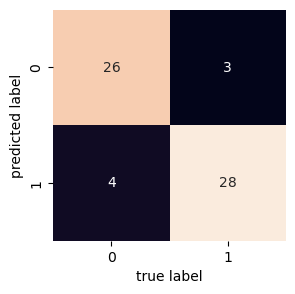

In [74]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(confusion_matrix,annot=True, cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")

In [75]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



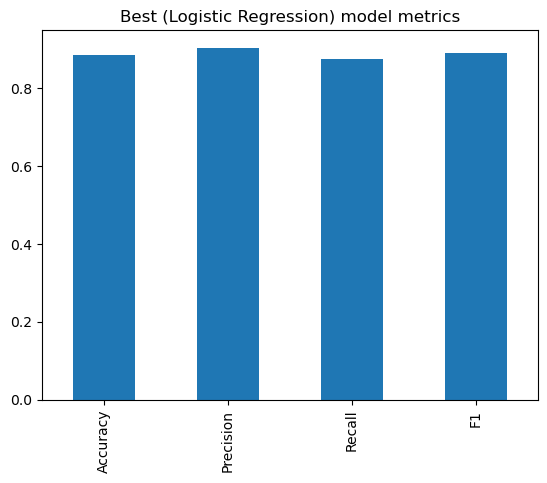

In [76]:
# PLOTTING THE METRICS OF THE BEST MODEL

metrics = pd.DataFrame({"Accuracy": acc,
                            "Precision": precision_score,
                            "Recall": recall_score,
                            "F1": f1_score},index=[0])

metrics

metrics.T.plot.bar(title = "Best (Logistic Regression) model metrics", legend=False);

In [77]:
# PRINTING LEARNED COEFFICIENTS (WEIGHTS) FOR EACH FEATURE IN OUR BEST MODEL (LOGISTIC REGRESSION)
best_model_lr.coef_

array([[ 0.26287004, -0.26286796, -0.38352238,  0.07405575,  0.25494486,
         0.05452384, -0.03700559,  0.03700767, -0.10671113,  0.1152178 ,
        -0.00850459,  0.23765231, -0.23765023, -0.01013726, -0.21151175,
         0.22165109,  0.46786037, -0.22617213, -0.19510426, -0.06887241,
         0.02229052,  0.00964407,  0.00257736,  0.37346844, -0.38568779,
        -0.05113061, -0.17139696, -0.04656086,  0.26931138, -0.3561635 ]])

In [78]:
# Match features to columns
features_dict = dict(zip(df.columns, list(best_model_lr.coef_[0])))
features_dict

{'age': 0.26287003698027966,
 'sex': -0.2628679580468567,
 'cp': -0.38352237557637825,
 'trestbps': 0.07405574551737051,
 'chol': 0.2549448644612195,
 'fbs': 0.054523844531211285,
 'restecg': -0.0370055933278741,
 'thalach': 0.03700767226129722,
 'exang': -0.10671113469771669,
 'oldpeak': 0.11521779944043654,
 'slope': -0.008504585809296772,
 'ca': 0.23765231007400894,
 'thal': -0.2376502311405858}

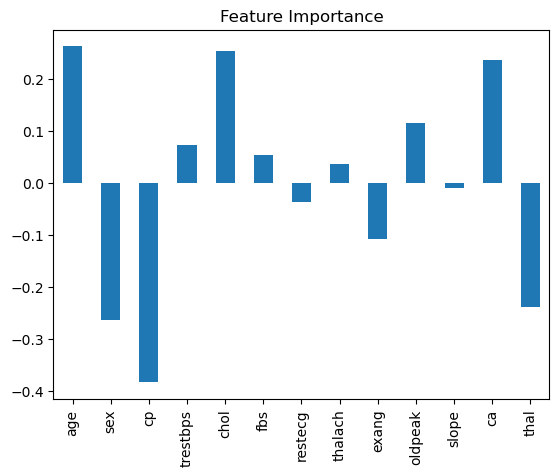

In [79]:
# VISUALIZING FEATURE IMPORTANCE

features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

AUC: 0.940


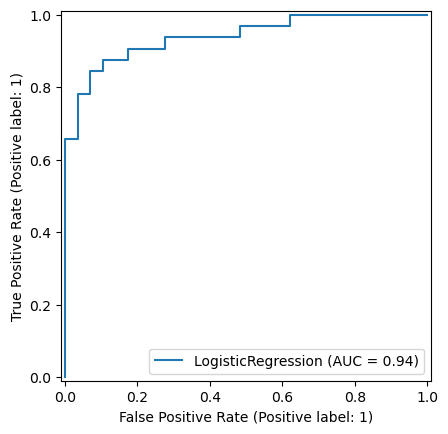

In [80]:
# ROC CURVE FOR THE BEST MODEL

# Plotting the curve
RocCurveDisplay.from_estimator(estimator=best_model_lr, 
                               X=X_test, 
                               y=y_test); 

# Calculating AUC

y_pred_proba = best_model_lr.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC: {auc:.3f}")



C:\Users\IrfanF\AppData\Local\Temp\ipykernel_20388\1430129825.py:18: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=True, plot_size=(10, 6))


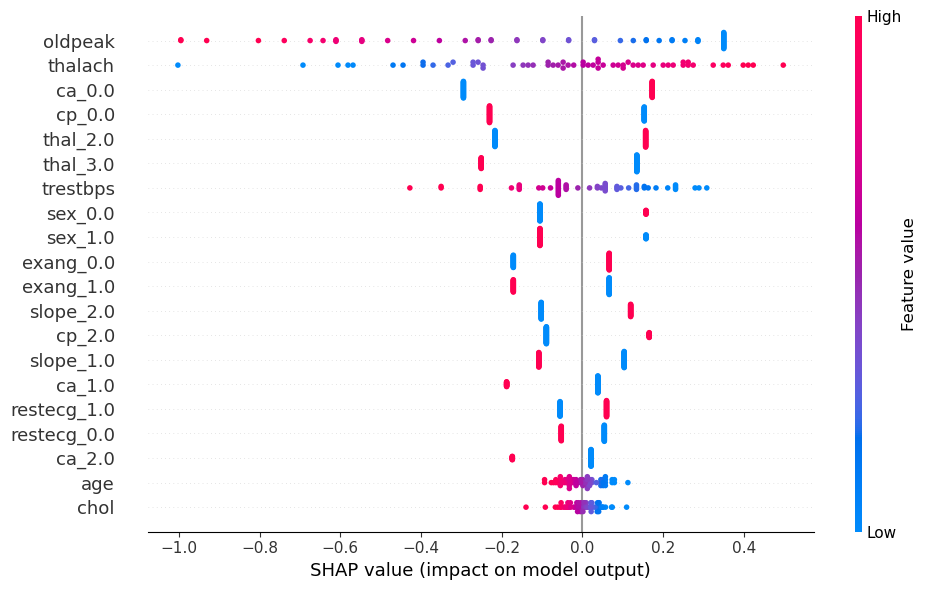

In [81]:
import shap


# Get feature names
num_feature_names = list(num_cols)
cat_feature_names = list(ct.named_transformers_['onehot'].get_feature_names_out(cat_cols))
feature_names = cat_feature_names + num_feature_names

# Create explainer using numpy arrays to avoid feature name warnings
explainer = shap.LinearExplainer(best_model_lr, X_trainval)
shap_values = explainer.shap_values(X_test)

# Convert to DataFrames for visualization (SHAP handles this internally)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# SHAP summary plot with explicit RNG to avoid FutureWarning
rng = np.random.default_rng(42)
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=True, plot_size=(10, 6))

In [82]:
# SHAP force plot for one instance (individual explanation)
shap.initjs()
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], X_test_df.iloc[i])

# If you want explicit probability of 1 for this sample
pred = best_model_lr.predict_proba(X_test_df.iloc[[i]].values)[0, 1]
print(f"Predicted probability for sample {i}: {pred:.3f}")

# If the plot is not clear, you can list all features and their SHAP values for this sample as a table
sample_shap = pd.DataFrame({
    'Feature': X_test_df.columns,
    'Value': X_test_df.iloc[i].values,
    'SHAP': shap_values[i]
})
# Add a column for absolute SHAP values
sample_shap['Abs_SHAP'] = sample_shap['SHAP'].abs()
# Sort by absolute contribution in descending order
sample_shap_sorted = sample_shap.sort_values(by='Abs_SHAP', ascending=False).drop(columns='Abs_SHAP')

sample_shap_sorted

Predicted probability for sample 0: 0.121


,Feature,Value,SHAP
16,ca_0.0,0.000000,-0.294752
24,thal_3.0,1.000000,-0.250697
28,thalach,-0.833996,-0.246050
2,cp_0.0,1.000000,-0.230113
23,thal_2.0,0.000000,-0.216612
17,ca_1.0,1.000000,-0.187723
11,exang_0.0,0.000000,-0.171110
12,exang_1.0,1.000000,-0.171108
14,slope_1.0,1.000000,-0.107871
0,sex_0.0,0.000000,-0.105148


In [83]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_trainval,
    feature_names=feature_names,
    class_names=['No', 'Yes'],
    mode='classification'
)

# Explain a single prediction
i = 15  # row in X_test dataset
exp = explainer.explain_instance(
    data_row=X_test_df.iloc[i].values,
    predict_fn=lambda x: best_model_lr.predict_proba(x),
    num_features=10  # how many features to display
)

# Printing features and their LIME values, ie contributions
lime_exp_list = exp.as_list()
print(lime_exp_list)

exp.show_in_notebook(show_table=True)

[('0.00 < ca_0.0 <= 1.00', 0.10589836582054174), ('thalach > 0.69', 0.1009831910816153), ('thal_3.0 <= 0.00', 0.08992546947974457), ('0.00 < thal_2.0 <= 1.00', 0.0862166569790526), ('cp_0.0 <= 0.00', 0.08418566340091045), ('0.00 < sex_1.0 <= 1.00', -0.06433622781483306), ('0.00 < cp_2.0 <= 1.00', 0.059756407718303255), ('sex_0.0 <= 0.00', -0.05640359557648385), ('0.00 < slope_2.0 <= 1.00', 0.05256753298467385), ('exang_1.0 <= 0.00', 0.05039668813344102)]


In [84]:
# SAVE MODEL COMPONENTS

joblib.dump(imputer, "../models/imputer.joblib")
joblib.dump(imputer_cat, "../models/imputer_cat.joblib")
joblib.dump(sc, "../models/sc.joblib")
joblib.dump(ct, "../models/ct.joblib")
joblib.dump(le, "../models/le.joblib")
joblib.dump(best_model_lr, "../models/model.joblib")

print("Saved: model, imputers, scaler, transformer, and label encoder.")

Saved: model, imputers, scaler, transformer, and label encoder.
